In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
import pprint
import csv
import pickle
import multiprocessing
from mint_general_interpolation_grid_builder.functions_natalie.custom_mpl_settings import (
    load_mpl_rc,
)
load_mpl_rc()
cmap = plt.get_cmap('viridis')
m = mp.MESA()


from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.MS_table_builder import MainSequenceTableBuilder
from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.GB_table_builder import RedGiantBranchTableBuilder
from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.CHeB_table_builder import (
    CoreHeliumBurningTableBuilder,
)
from mint_general_interpolation_grid_builder.MINT.src.MINT_table_builders.EAGB_table_builder import (
    EarlyAsymptoticGiantBranchTableBuilder,
)
from mint_general_interpolation_grid_builder.MINT.config.table_columns import table_columns


evol_phase = 'EAGB'

settings = {
    **table_columns,
    'grid_directory':f'/Users/natalierees/MINT_grids_23051/Z0.02/{evol_phase}',
    'metallicity':0.02,
    'num_processes':4
}

if evol_phase == 'MS':
    tester = MainSequenceTableBuilder(settings=settings)
elif evol_phase == 'GB':
    tester = RedGiantBranchTableBuilder(settings=settings)
elif evol_phase == 'CHeB':
    tester = CoreHeliumBurningTableBuilder(settings=settings)
elif evol_phase == 'EAGB':
    tester = EarlyAsymptoticGiantBranchTableBuilder(settings=settings)

Building a grid with (X_0, Y_0, Z_0)=(0.7, 0.28, 0.02)


In [2]:
df_run_time = pd.read_csv(f'/Users/natalierees/MINT_grids_23051/Z0.02/{evol_phase}/run_time.csv',index_col = [0])
print(df_run_time.head())

            MS  TAMS_MASS_CHANGE         GB  CHeB  EAGB
0.08  0.374167               NaN        NaN   NaN   NaN
0.13  0.414167               NaN   2.749722   NaN   NaN
0.18  0.347500               NaN   8.082778   NaN   NaN
0.23  0.343889               NaN  16.564167   NaN   NaN
0.28  0.386389               NaN  46.726389   NaN   NaN


In [8]:
print(f'/Users/natalierees/MINT_grids_23051/Z0.02/{evol_phase}/run_time.csv')

/Users/natalierees/MINT_grids_23051/Z0.02/EAGB/run_time.csv


In [4]:
print('Total run time:')
print(df_run_time.sum())
print('\n')
print('Longest mass run time:')
print(df_run_time.max())

Total run time:
MS                   72.929167
TAMS_MASS_CHANGE      0.000000
GB                  593.501111
CHeB                 24.996389
EAGB                875.482778
dtype: float64


Longest mass run time:
MS                    2.328611
TAMS_MASS_CHANGE           NaN
GB                   51.530833
CHeB                 11.950278
EAGB                130.766944
dtype: float64


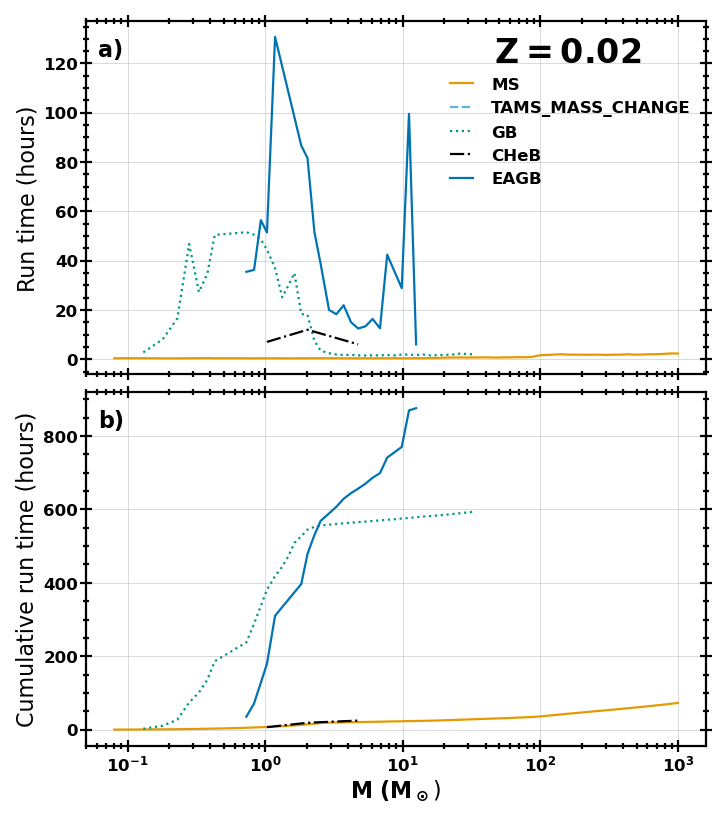

In [7]:
fig,ax=plt.subplots(2,1,figsize=(10,12),sharex=True)
for evol_phase in df_run_time.columns:
    ax[0].plot((df_run_time[evol_phase].dropna().index),df_run_time[evol_phase].dropna().values,label = evol_phase)
    ax[1].plot((df_run_time[evol_phase].dropna().index),np.cumsum(df_run_time[evol_phase].dropna().values),label = evol_phase)

ax[0].legend(title='$Z={}$'.format(settings['metallicity']))

ax[0].set(ylabel='Run time (hours)')
ax[1].set(xlabel='$M~(\mathrm{M}_\odot$)',ylabel='Cumulative run time (hours)')
ax[1].set_xscale('log')


ax[0].text(0.02,0.9,'a)',transform=ax[0].transAxes)
ax[1].text(0.02,0.9,'b)',transform=ax[1].transAxes)

plt.savefig(f'plots/run_time.jpeg',dpi=200)

In [71]:
settings['grid_directory'].replace('GB','MS')

'/Users/natalierees/MINT_grids_23051/Z0.02/MS'